# PyCRTBP
## CRTBP Periodic Orbits and Utilities

In [38]:
import pycrtbp as p3
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
sys = p3.System(mu="Earth")

In [3]:
sys.mu

3.04043e-06

In [5]:
sys.__dict__

{'_mu': 3.04043e-06, '_refsystem': 'barycenter', 'particles': {}}

In [6]:
LP = sys.getLagrangePoints()

In [7]:
LP

{'L1': [0.9899859751846545, 0],
 'L2': [1.0100752073785297, 0],
 'L3': [-1.0000012668458333, 0],
 'L4': [0.49999695957, 0.8660254037844386],
 'L5': [0.49999695957, -0.8660254037844386]}

In [8]:
sys.__dict__

{'_mu': 3.04043e-06, '_refsystem': 'barycenter', 'particles': {}}

In [9]:
r = np.array([1.1, 0, 0])
v = np.array([-0.1, 0.2, 0])
sys.add(r = r, v = v)

In [10]:
sys.__dict__

{'_mu': 3.04043e-06,
 '_refsystem': 'barycenter',
 'particles': {0: Particle(name(id) = 0, r0 = [1.1 0.  0. ], v0 =[-0.1  0.2  0. ], r = [1.1 0.  0. ], v = [-0.1  0.2  0. ], time = 0, period = None)}}

In [11]:
sys.getJacobiConstant(p=0)

2.978232071403524

In [12]:
y, t = sys.propagate(time=0.5, p=0, N=2)
y,t

(array([[ 1.1       ,  0.        ,  0.        , -0.1       ,  0.2       ,
          0.        ],
        [ 1.1351028 ,  0.09768839,  0.        ,  0.2378439 ,  0.13671884,
          0.        ]]),
 array([0. , 0.5]))

In [13]:
sys.__dict__

{'_mu': 3.04043e-06,
 '_refsystem': 'barycenter',
 'particles': {0: Particle(name(id) = 0, r0 = [1.1 0.  0. ], v0 =[-0.1  0.2  0. ], r = [1.1351028  0.09768839 0.        ], v = [0.2378439  0.13671884 0.        ], time = 0.5, period = None)}}

In [26]:
y,t = sys.propagate(time=0.5, p=0, N=2, from_current=True)
y,t

(array([[ 1.70097289, -1.38909917,  0.        , -0.50713631, -1.58056532,
          0.        ],
        [ 1.23272766, -2.17153956,  0.        , -1.37952702, -1.46793165,
          0.        ]]),
 array([0. , 0.5]))

In [27]:
sys.__dict__

{'_mu': 3.04043e-06,
 '_refsystem': 'barycenter',
 'particles': {0: Particle(name(id) = 0, r0 = [1.1 0.  0. ], v0 =[-0.1  0.2  0. ], r = [ 1.23272766 -2.17153956  0.        ], v = [-1.37952702 -1.46793165  0.        ], time = 3.0, period = None)}}

In [28]:
sys.particles[0].time

3.0

In [32]:
STM, ts = sys.getSTM(p=0,time=0.5)

/home/jzuluaga/.local/lib/python3.10/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `n`.
  warn("The following arguments have no effect for a chosen solver: {}."


In [34]:
STM.shape

(6, 6)

Solución completa:

In [50]:
sys = p3.System(mu=0.3)
sys.add(r=[1,0,0],v=[0,0.5,0])
solucion,ts = sys.propagate(time=10,p=0,N=1000)

In [51]:
solucion.shape

(1000, 6)

(-0.891449963341349,
 1.0900690458733975,
 -0.4697244775192163,
 0.43521218411689366)

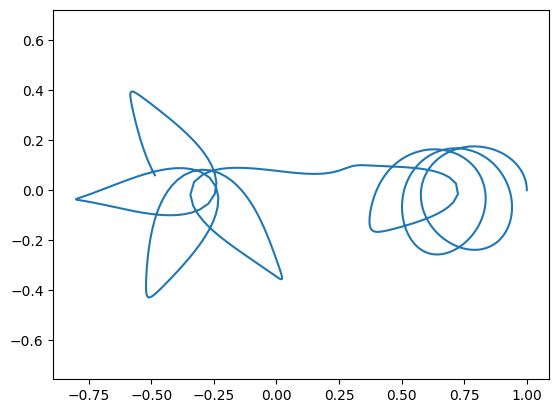

In [52]:
plt.plot(solucion[:,0],solucion[:,1])
plt.axis('equal')

In [49]:
sys.toInertialFrame(p=0,r=ys[:,:3],v=ys[:,3:6])

(array([-0.3, -0. , -0. ]),
 array([0.7, 0. , 0. ]),
 array([1. , 0. , 0. , 0. , 1.5, 0. ]))

In [102]:
sys = p3.System(mu=1.215058560962404E-2)
sys.add(r=[4.3840151982551506E-1,8.1854815386736461E-23,-2.4989800229106000E-25],v=[2.1780773271699781E-13,1.3613843962742438E+0,-8.2105956297402337E-25])
sys.refsystem = 'barycenter'
solucion,ts = sys.propagate(time=10,p=0,N=1000)

import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter3d(
    x=solucion[:, 0],
    y=solucion[:, 1],
    z=solucion[:, 2],
    mode='lines',
    line=dict(color='blue', width=2),
))

rang = 2
fig.update_layout(scene=dict(
    xaxis=dict(title='X',range=[-rang,rang]),
    yaxis=dict(title='Y',range=[-rang,rang]),
    zaxis=dict(title='Z',range=[-rang,rang]),
))

fig.show()

In [104]:
sys.getLagrangePoints()

{'L1': [0.8369779776417264, 0],
 'L2': [1.1557338510638688, 0],
 'L3': [-1.0050626296754341, 0],
 'L4': [0.48784941439037594, 0.8660254037844386],
 'L5': [0.48784941439037594, -0.8660254037844386]}

In [105]:
sys.mu

0.01215058560962404

In [112]:
sys = p3.System(mu=1.215058560962404E-2)
# 1.1442729375808927E+0	-2.5570518644231412E-20	9.7411817634090236E-2	1.0072600603243715E-2	-3.4395156291560752E-1	2.8345900193831092E-1
sys.add(r=[1.1442729375808927E+0-(1-sys.mu),-2.5570518644231412E-20,9.7411817634090236E-2],v=[1.0072600603243715E-2,-3.4395156291560752E-1,2.8345900193831092E-1])
sys.refsystem = 'secondary'
solucion,ts = sys.propagate(time=10,p=0,N=1000)

import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter3d(
    x=solucion[:, 0],
    y=solucion[:, 1],
    z=solucion[:, 2],
    mode='lines',
    line=dict(color='blue', width=2),
))

rang = 2.2
fig.update_layout(scene=dict(
    xaxis=dict(title='X',range=[-rang,rang]),
    yaxis=dict(title='Y',range=[-rang,rang]),
    zaxis=dict(title='Z',range=[-rang,rang]),
))

fig.show()

In [94]:
sys.mu

0.0121437

In [95]:
sys.getLagrangePoints()

{'L1': [0.8370118043226862, 0],
 'L2': [1.1557073133547142, 0],
 'L3': [-1.0050597608755287, 0],
 'L4': [0.4878563, 0.8660254037844386],
 'L5': [0.4878563, -0.8660254037844386]}

In [96]:
sys.mu

0.0121437